In [1]:
!ls ../../data/

tanzania_features.csv
tanzania_target.csv


In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
%matplotlib inline 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np 
import pandas as pd
import os 
from datetime import date 
from time import strftime 

from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression 
from sklearn import ensemble 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Seeing the data 

In [3]:
features = pd.read_csv('../../data/tanzania_features.csv')

#features.columns = [col.strip() for col in features.columns]
features

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


In [4]:
target=pd.read_csv('../../data/tanzania_target.csv')
target

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [5]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [6]:
features.nunique()

id                       59400
amount_tsh                  98
date_recorded              356
funder                    1897
gps_height                2428
installer                 2145
longitude                57516
latitude                 57517
wpt_name                 37400
num_private                 65
basin                        9
subvillage               19287
region                      21
region_code                 27
district_code               20
lga                        125
ward                      2092
population                1049
public_meeting               2
recorded_by                  1
scheme_management           12
scheme_name               2696
permit                       2
construction_year           55
extraction_type             18
extraction_type_group       13
extraction_type_class        7
management                  12
management_group             5
payment                      7
payment_type                 7
water_quality                8
quality_

In [7]:
for column in features.columns:
    print(f"Values in {column} ", features[column].unique()) 
    print(features[column].value_counts(normalize=True))

Values in id  [69572  8776 34310 ... 37057 31282 26348]
0        0.000017
19811    0.000017
38200    0.000017
34106    0.000017
36155    0.000017
           ...   
64138    0.000017
62091    0.000017
51852    0.000017
49805    0.000017
2047     0.000017
Name: id, Length: 59400, dtype: float64
Values in amount_tsh  [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03

In [8]:
new_df = features.merge(target, on='id')

In [9]:
#take out - funder -- num_private 
new_df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [10]:
#for column in new_df.columns:
    #print(f"Values in {column} ", new_df[column].unique()) 
    #print(new_df[column].value_counts(normalize=True))

In [11]:
new_df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [12]:
new_df.num_private.value_counts()

0      58643
6         81
1         73
8         46
5         46
       ...  
42         1
136        1
35         1
131        1
94         1
Name: num_private, Length: 65, dtype: int64

In [13]:
new_df.funder.value_counts()

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
                          ... 
Fdc                          1
Juma                         1
Kkkt Usa                     1
Quickwins                    1
Cida                         1
Name: funder, Length: 1897, dtype: int64

In [14]:
new_df.installer.value_counts()

DWE                             17402
Government                       1825
RWE                              1206
Commu                            1060
DANIDA                           1050
                                ...  
Amboni plantation                   1
SIPDO                               1
Egypt Technical Co Operation        1
KUMKUM                              1
TANGA CEMENT                        1
Name: installer, Length: 2145, dtype: int64

In [15]:
new_df.longitude.value_counts()

0.000000     1812
32.977191       2
32.919861       2
37.542785       2
39.105307       2
             ... 
37.141893       1
35.839879       1
33.638301       1
35.347266       1
35.164770       1
Name: longitude, Length: 57516, dtype: int64

In [16]:
new_df.latitude.value_counts()

-2.000000e-08    1812
-2.494546e+00       2
-6.983183e+00       2
-7.056923e+00       2
-7.056372e+00       2
                 ... 
-6.162973e+00       1
-1.595138e+00       1
-2.007878e+00       1
-6.787691e+00       1
-1.077290e+01       1
Name: latitude, Length: 57517, dtype: int64

In [17]:
#new_df.management.value_counts()

In [18]:
new_df.management_group.value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [19]:
new_df.scheme_name.value_counts()

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
                              ... 
Heka water supply                1
Itoo water supply                1
Jica                             1
Ikuna gravity water project      1
Kashishi water supply            1
Name: scheme_name, Length: 2696, dtype: int64

In [20]:
new_df.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

## Cleaning 

In [21]:
new_df.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [22]:
clean_df=new_df.drop(columns=['id', 'waterpoint_type', 'scheme_name', 'funder',
        'num_private', 'permit', 'extraction_type', 'extraction_type_group',
        'region_code','district_code','lga','ward', 'recorded_by', 'public_meeting',
        'scheme_management', 'installer', 'payment','water_quality', 'source_class','subvillage','quantity_group'
                             ,'management', 'source_type'])

In [23]:
clean_df.nunique()

amount_tsh                  98
date_recorded              356
gps_height                2428
longitude                57516
latitude                 57517
wpt_name                 37400
basin                        9
region                      21
population                1049
construction_year           55
extraction_type_class        7
management_group             5
payment_type                 7
quality_group                6
quantity                     5
source                      10
waterpoint_type_group        6
status_group                 3
dtype: int64

In [24]:
clean_df = clean_df[clean_df['construction_year']!=0]

In [25]:
clean_df = clean_df[clean_df['longitude']!=0]

In [26]:
clean_df = clean_df[clean_df['latitude']!=-2.000000e-08]

In [27]:
clean_df

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,region,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source,waterpoint_type_group,status_group
0,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Iringa,109,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,250,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,58,1986,submersible,user-group,never pay,good,dry,machine dbh,communal standpipe,non functional
5,20.0,2011-03-13,0,39.172796,-4.765587,Tajiri,Pangani,Tanga,1,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,0.0,2013-08-03,540,38.044070,-4.272218,Kwa,Pangani,Kilimanjaro,210,1967,gravity,user-group,never pay,good,enough,river,communal standpipe,non functional
59394,500.0,2011-03-09,351,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Morogoro,89,2007,submersible,user-group,monthly,good,enough,machine dbh,communal standpipe,non functional
59395,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,125,1999,gravity,user-group,per bucket,good,enough,spring,communal standpipe,functional
59396,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,56,1996,gravity,user-group,annually,good,enough,river,communal standpipe,functional


## Feature Importance 

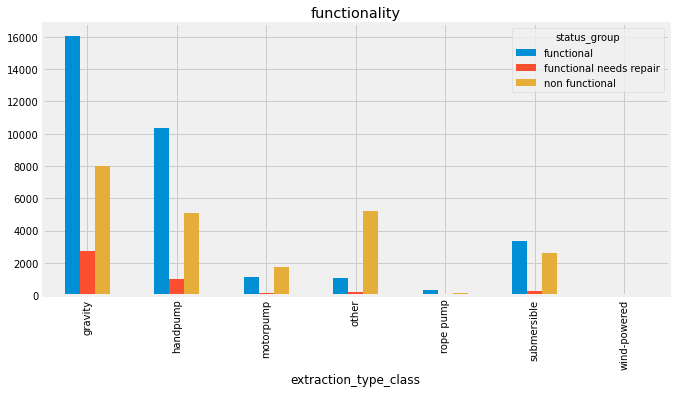

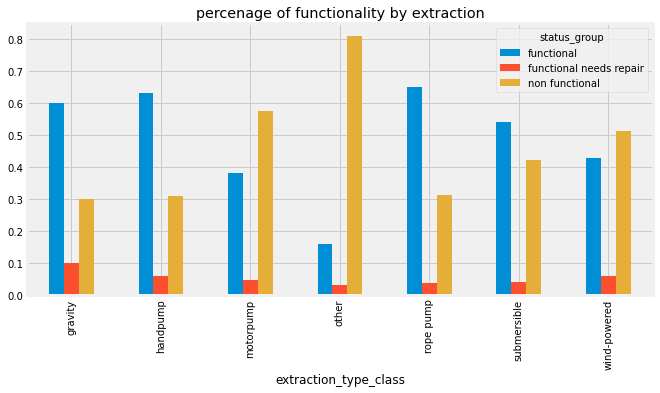

In [28]:
mplines = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('extraction_type_class')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()


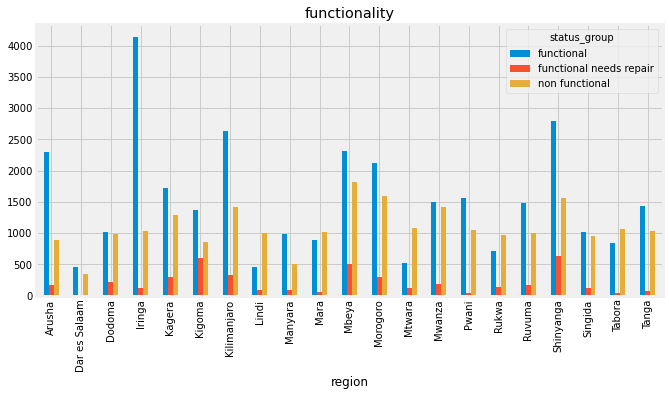

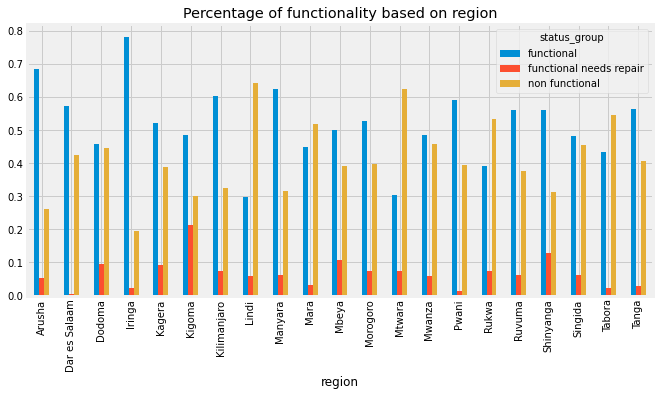

In [29]:
#functionality in region 
mplines = new_df.groupby('region')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('region')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on region")
plt.show()

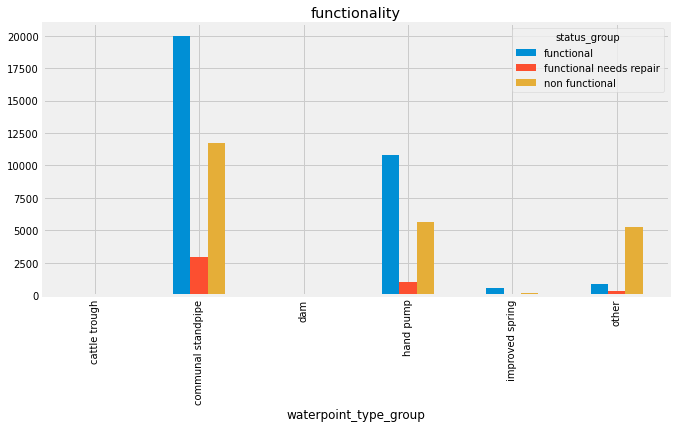

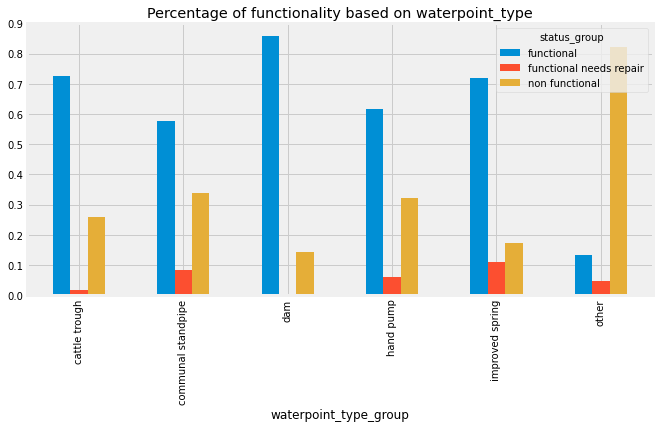

In [30]:
#waterpoint_type_group functionality 
mplines = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('waterpoint_type_group')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("Percentage of functionality based on waterpoint_type")
plt.show()

In [31]:
new_df.waterpoint_type_group.value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [32]:
new_df.source_type.value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [33]:
new_df.source_class.value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

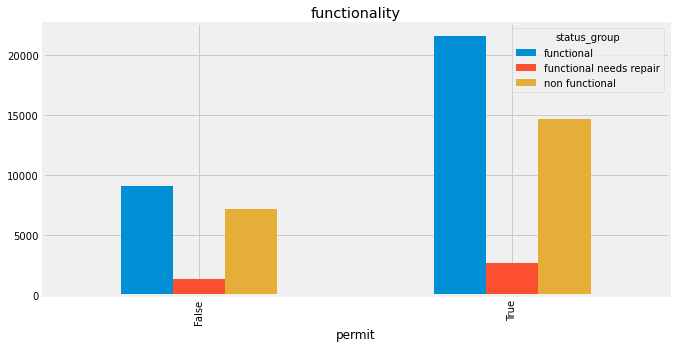

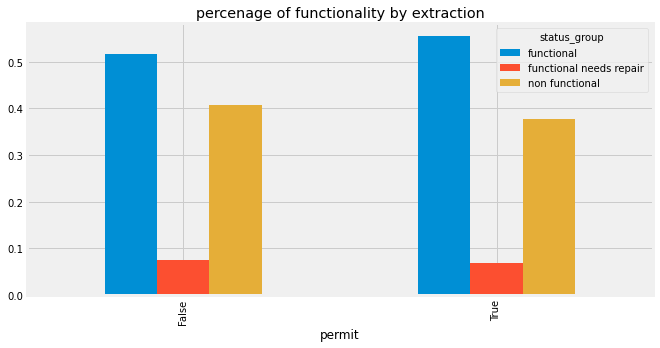

In [34]:
# permit vs non-permit 
mplines = new_df.groupby('permit')['status_group'].value_counts(normalize=False).unstack().plot(kind='bar', figsize=(10,5))
mplines.set_title("functionality")
plt.show()
mplines_pct = new_df.groupby('permit')['status_group'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(10,5))
mplines_pct.set_title("percenage of functionality by extraction")
plt.show()

In [35]:
clean_df

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,region,population,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source,waterpoint_type_group,status_group
0,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Iringa,109,1999,gravity,user-group,annually,good,enough,spring,communal standpipe,functional
1,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Mara,280,2010,gravity,user-group,never pay,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,250,2009,gravity,user-group,per bucket,good,enough,dam,communal standpipe,functional
3,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,58,1986,submersible,user-group,never pay,good,dry,machine dbh,communal standpipe,non functional
5,20.0,2011-03-13,0,39.172796,-4.765587,Tajiri,Pangani,Tanga,1,2009,submersible,user-group,per bucket,salty,enough,other,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,0.0,2013-08-03,540,38.044070,-4.272218,Kwa,Pangani,Kilimanjaro,210,1967,gravity,user-group,never pay,good,enough,river,communal standpipe,non functional
59394,500.0,2011-03-09,351,37.634053,-6.124830,Chimeredya,Wami / Ruvu,Morogoro,89,2007,submersible,user-group,monthly,good,enough,machine dbh,communal standpipe,non functional
59395,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kilimanjaro,125,1999,gravity,user-group,per bucket,good,enough,spring,communal standpipe,functional
59396,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Iringa,56,1996,gravity,user-group,annually,good,enough,river,communal standpipe,functional


In [84]:
clean_df['status_group'] = clean_df["status_group"].replace("functional needs repair", "non functional")

## Further analysis -- model prep

In [89]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             38691 non-null  float64
 1   date_recorded          38691 non-null  object 
 2   gps_height             38691 non-null  int64  
 3   longitude              38691 non-null  float64
 4   latitude               38691 non-null  float64
 5   wpt_name               38691 non-null  object 
 6   basin                  38691 non-null  object 
 7   region                 38691 non-null  object 
 8   population             38691 non-null  int64  
 9   construction_year      38691 non-null  int64  
 10  extraction_type_class  38691 non-null  object 
 11  management_group       38691 non-null  object 
 12  payment_type           38691 non-null  object 
 13  quality_group          38691 non-null  object 
 14  quantity               38691 non-null  object 
 15  so

In [90]:
mapping_df = clean_df[['gps_height','longitude','latitude']]

In [91]:
cat_df=clean_df[['status_group','region','population','management_group','quality_group','extraction_type_class',
                 'management_group']]

In [92]:
model_df = pd.get_dummies(cat_df)
model_df

,population,status_group_functional,status_group_non functional,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,...,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal,management_group_unknown,management_group_user-group
0,109,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,280,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,250,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,58,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59391,210,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
59394,89,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
59395,125,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
59396,56,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [94]:
model_df.columns

Index(['population', 'status_group_functional', 'status_group_non functional',
       'region_Arusha', 'region_Dar es Salaam', 'region_Iringa',
       'region_Kigoma', 'region_Kilimanjaro', 'region_Lindi', 'region_Manyara',
       'region_Mara', 'region_Morogoro', 'region_Mtwara', 'region_Mwanza',
       'region_Pwani', 'region_Rukwa', 'region_Ruvuma', 'region_Shinyanga',
       'region_Singida', 'region_Tanga', 'management_group_commercial',
       'management_group_other', 'management_group_parastatal',
       'management_group_unknown', 'management_group_user-group',
       'quality_group_colored', 'quality_group_fluoride', 'quality_group_good',
       'quality_group_milky', 'quality_group_salty', 'quality_group_unknown',
       'extraction_type_class_gravity', 'extraction_type_class_handpump',
       'extraction_type_class_motorpump', 'extraction_type_class_other',
       'extraction_type_class_rope pump', 'extraction_type_class_submersible',
       'extraction_type_class_wind-powe

In [95]:
y= model_df['status_group_non functional']
X= model_df.drop(columns=['status_group_non functional', 'status_group_functional',
                         'management_group_unknown','management_group_user-group'])

In [96]:
y.value_counts(normalize=True)

0    0.560957
1    0.439043
Name: status_group_non functional, dtype: float64

## Train test split 

In [97]:
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=.15, random_state=2022, stratify=y)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=.15, random_state=2022, stratify=y_tr)

In [99]:
X_train.head()

,population,region_Arusha,region_Dar es Salaam,region_Iringa,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Morogoro,...,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,management_group_commercial,management_group_other,management_group_parastatal
24471,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1942,100,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15869,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
32586,120,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
25029,100,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


## Modeling logreg1

In [120]:
def modeling_function(model, X_train, y_train, X_val, y_val):

    # fit model on training data
    model.fit(X_train, y_train)

    # make predictions on training and validation data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Print accuracy score
    print('Training accuracy: ', accuracy_score(y_train, train_preds))
    print('Validation accuracy: ', accuracy_score(y_val, val_preds))

    # return fitted model
    return model

In [101]:
logreg = LogisticRegression()

In [102]:
logreg = modeling_function(logreg, X_train, y_train, X_val, y_val)

Training accuracy:  0.6668693879011197
Validation accuracy:  0.678759627077422


In [135]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(logreg, X_train, y_train, cv=3,
                             method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

## Confusion Matrix 

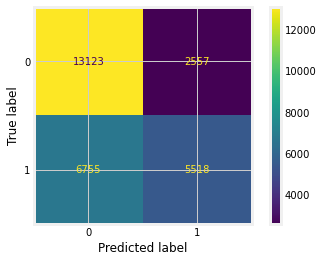

In [136]:
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
plot_confusion_matrix(logreg, X_train, y_train)

In [137]:
sm = SMOTE(random_state=2021)

In [138]:
scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [139]:
X_train_sc=scaler.transform(X_train)

In [140]:
X_train_res, y_train_res = sm.fit_resample(X_train_sc, y_train)

## Logreg2

In [103]:
logreg2 = LogisticRegression(penalty='l1', solver='liblinear')

In [104]:
logreg2.fit(X_train_res, y_train_res)

LogisticRegression(penalty='l1', solver='liblinear')

In [105]:
logreg2 = modeling_function(logreg2, X_train_res, y_train_res, X_val, y_val)

Training accuracy:  0.6697313347404572
Validation accuracy:  0.6824077827320633


In [106]:
logreg2_coefs = pd.DataFrame(np.abs(logreg2.coef_.T), columns=['coefficient'], index=X_train.columns)
logreg2_coefs

,coefficient
population,0.000183
region_Arusha,0.435382
region_Dar es Salaam,0.083804
region_Iringa,0.931536
region_Kigoma,0.406219
region_Kilimanjaro,0.009487
region_Lindi,0.665816
region_Manyara,0.242858
region_Mara,0.564080
region_Morogoro,0.100070


In [107]:
sorted2_coefs = logreg2_coefs.sort_values(by='coefficient', ascending=False)
sorted2_coefs

,coefficient
quality_group_unknown,2.024675
extraction_type_class_other,1.640261
extraction_type_class_wind-powered,1.084806
region_Iringa,0.931536
region_Mtwara,0.782952
region_Shinyanga,0.706104
region_Mwanza,0.667835
region_Lindi,0.665816
region_Rukwa,0.631033
extraction_type_class_motorpump,0.600731


## 

## Random Forest

In [108]:
forest = RandomForestClassifier(max_depth=2, random_state=101)
forest.fit(X_train_res, y_train_res)


y_forest_pred = forest.predict(X_test)

print('Accuracy of random forest classifier: {:.2f}'.format(forest.score(X_test, y_test)))

Accuracy of random forest classifier: 0.65


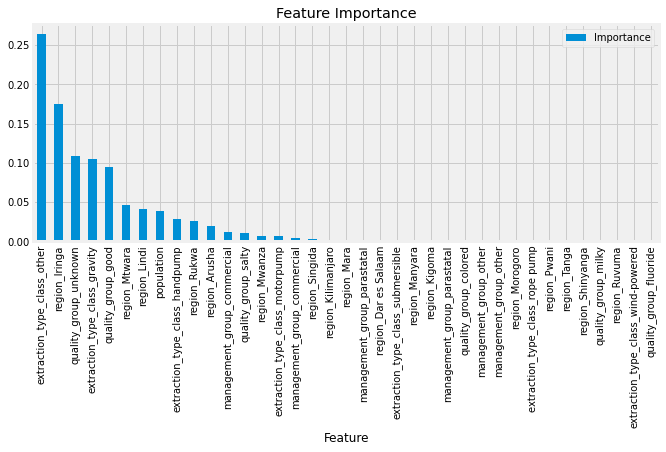

In [109]:
importances = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': forest.feature_importances_}).set_index('Feature').sort_values('Importance',ascending=False)

# plot the importances
importances = importances.plot(kind='bar', figsize=(10,4))
importances = importances.set_title("Feature Importance")
plt.show()

## Grid Search on Ramdom forrest

In [110]:
from sklearn.model_selection import GridSearchCV
param_grid1 = {'n_estimators': [50, 75, 100],
                'max_depth': [1, 3, 5, 7, 10],
                'min_samples_leaf': [1, 3, 5, 7]}

In [111]:
rf_gs = GridSearchCV(estimator=forest, param_grid=param_grid1, scoring='accuracy')

In [141]:
rf_gs.fit(X_train_res, y_train_res)

GridSearchCV(estimator=RandomForestClassifier(max_depth=2, random_state=101),
             param_grid={'max_depth': [1, 3, 5, 7, 10],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'n_estimators': [50, 75, 100]},
             scoring='accuracy')

In [142]:
forest_model = rf_gs.best_estimator_

In [143]:
modeling_function(forest_model, X_train_res, y_train_res, X_val, y_val)

Training accuracy:  0.6927933673469387
Validation accuracy:  0.6793676530198621


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=101)

## Decision Tree 

In [115]:
dt = DecisionTreeClassifier(random_state = 2022)

In [144]:
dt = modeling_function(dt, X_train_res, y_train_res, X_val, y_val)

Training accuracy:  0.7866709183673469
Validation accuracy:  0.5622213214430483


## Decision Tree Grid Search 

In [117]:
param_grid2 = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}

dtree_gscv = GridSearchCV(dt, param_grid2, cv=3)
    
dtree_gscv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [118]:
dtree_gscv.best_estimator_

DecisionTreeClassifier(max_depth=14, random_state=2022)

In [119]:
modeling_function(dtree_gscv, X_train, y_train, X_val, y_val)

Training accuracy:  0.7163095195506743
Validation accuracy:  0.6927442237535468


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

## XG Boost -- water quaity vs functionality -- 